# Imports

In [1]:
# Reload modules before executing code
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path
import pandas as pd
import yaml

# Get the current working directory (works for Jupyter or interactive environments)
project_dir = str(Path.cwd().parent.parent.parent)  # Adjust parent levels as needed
sys.path.append(project_dir)

from src.utils.plots import (
    load_config_file,
    get_cluster_files,
    load_results_path,
    plot_histograms_period,
    plot_metric_map_period,
    plot_nse_cdf,
    plot_comparative_histograms
)

PLOT_CLUSTERS = True
cluster_files = get_cluster_files() if PLOT_CLUSTERS else None

##############################################################################
# config_file = 'config_process_concept.yml'
config_file = 'config_process_hybrid_mlp35x5.yml'
# config_file = 'config_julia_hybrid_mlp32x5bosh3.yml'

config_file_cdf = 'config_cfd_plots_569basins.yml'

config_file_comp_hist = 'config_compare_histograms.yml'
##############################################################################

/scratch/gwf/gwf_cmt/jcurbelo/torchHydroNodes/venv-hydronodes/lib/python3.10/site-packages/pyproj/__init__.py:91: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


# Load config and create folders

In [2]:
cfg = load_config_file(Path(config_file))

results_folder = Path(cfg['results_folder'])
periods = cfg['periods']
epochs = cfg['epochs'] if 'epochs' in cfg else None
metrics = cfg['metrics']
threshold_dict = cfg['threshold_dict']
metrics_path, results_path = load_results_path(results_folder, periods)
plots_folder = Path(cfg['plots_folder'])
graph_title = cfg['graph_title']

Folder 'model_metrics' already exists in ../../scripts_paper/569basins_single_mlp32x5_256b_euler05d_lr34_100ep_1000pre_lr3_carryoverYES. Deleting the folder...


# Plot results

## CDF

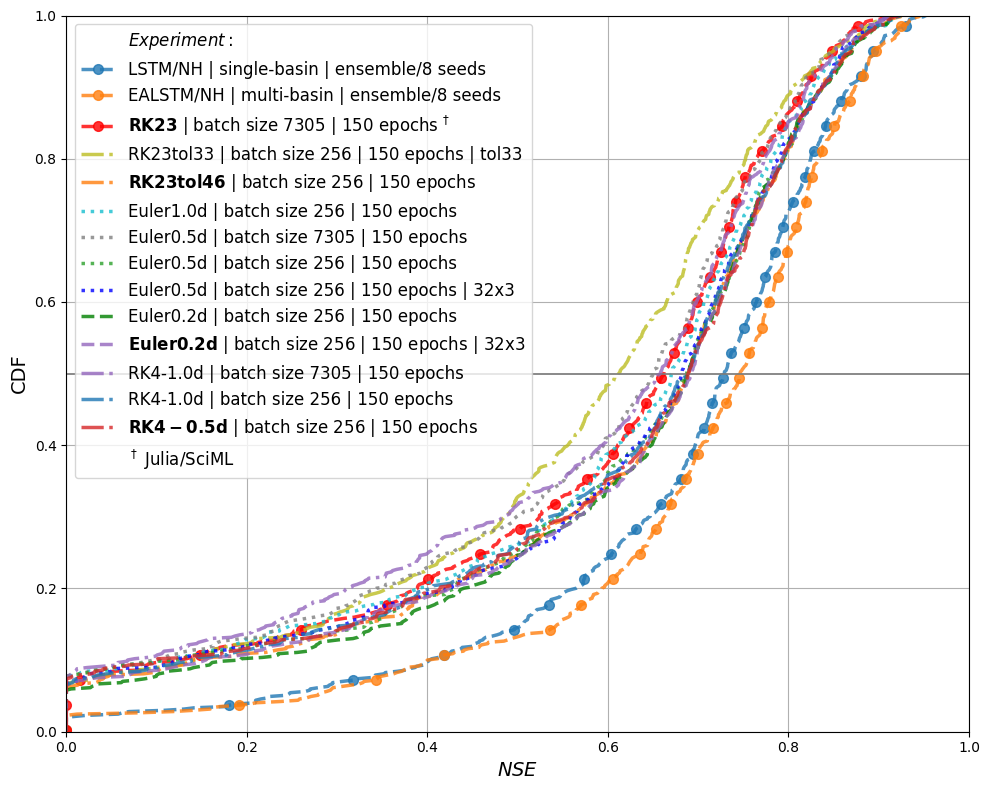

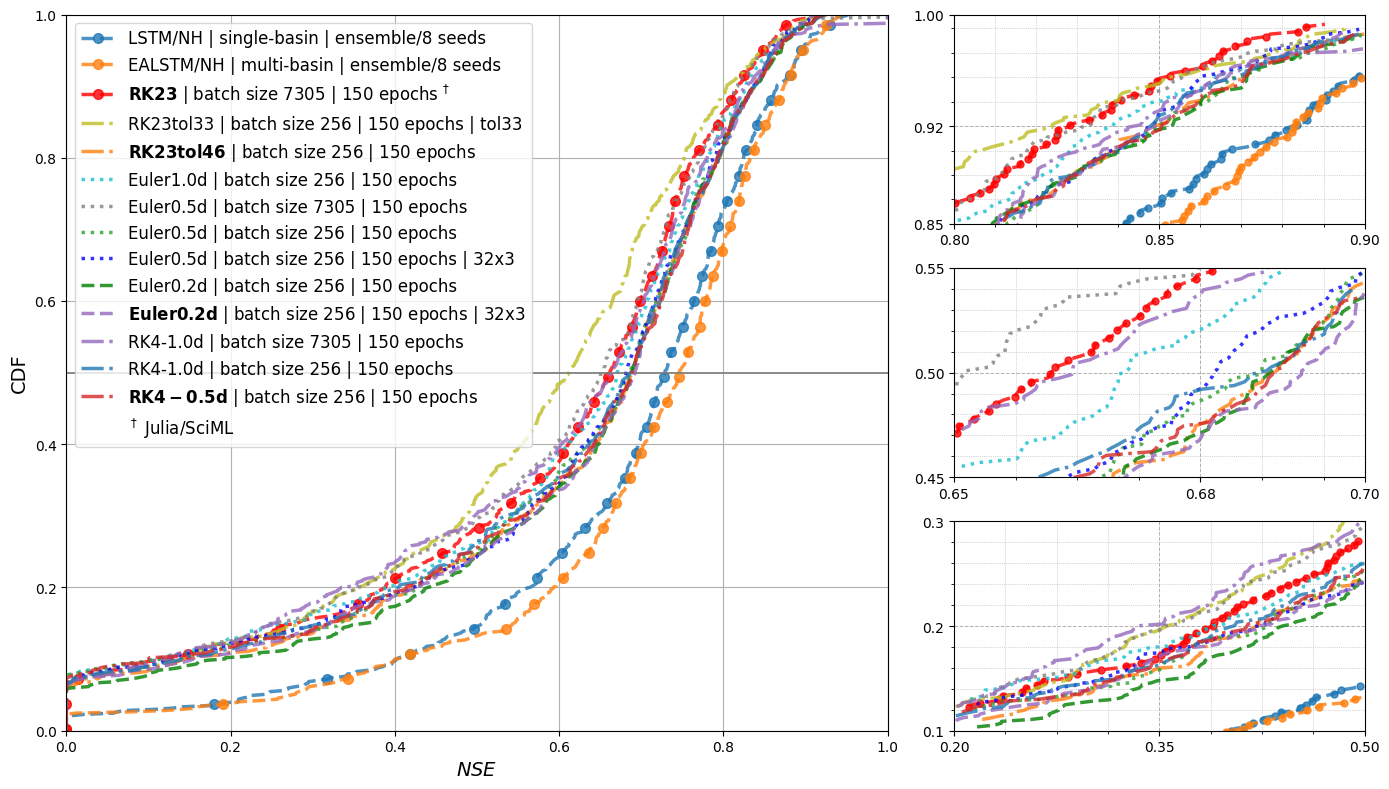

In [3]:
# Load config_file
with open(config_file_cdf, 'r') as ymlfile:
        config_data_cdf = yaml.load(ymlfile, Loader=yaml.FullLoader)

folder4cdf_dir_list = config_data_cdf['folders4cdf_dir']


# Define zoom ranges
zoom_ranges_x = [(0.8, 0.9), (0.65, 0.7), (0.2, 0.5)]
zoom_ranges_y = [(0.85, 1.0), (0.45, 0.55), (0.1, 0.3)]

# Call the function
plot_nse_cdf(folder4cdf_dir_list, zoom_ranges_x, zoom_ranges_y)

## Histograms

### Single + Clusters

In [ ]:
metrics_path

PosixPath('../../scripts_paper/569basins_single_mlp32x5_256b_euler05d_lr34_100ep_1000pre_lr3_carryoverYES/model_metrics')

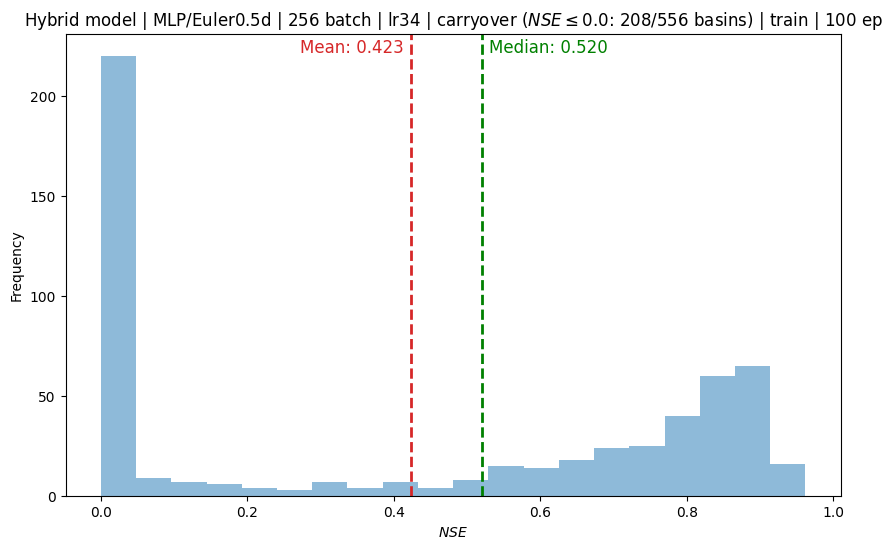

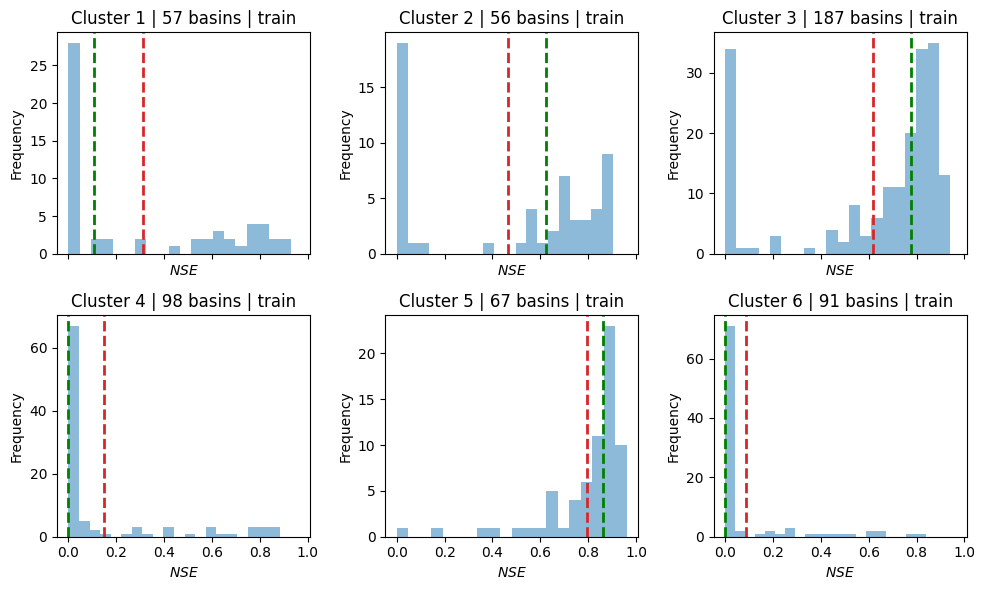

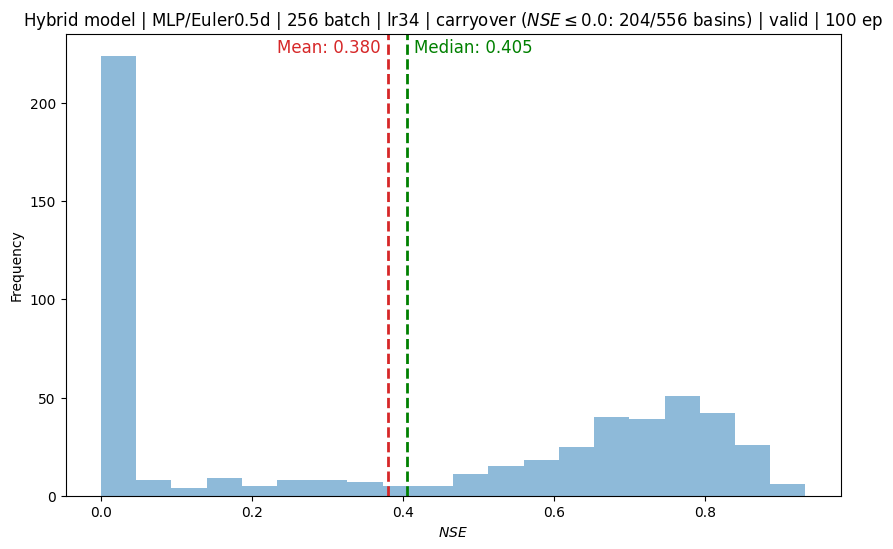

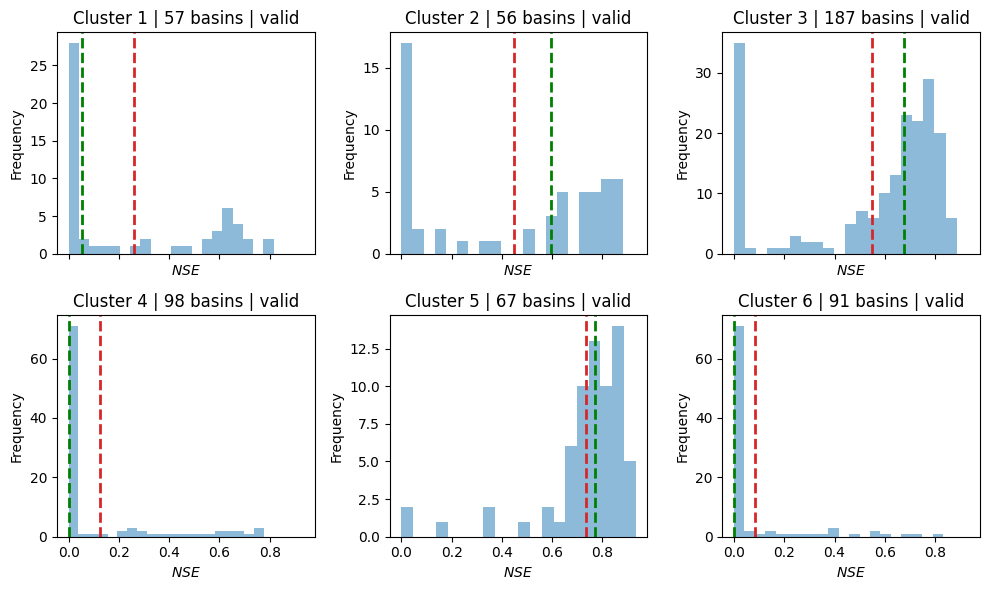

In [5]:
# Assuming results_path, periods, metrics, threshold_dict, and plots_folder are defined
plot_histograms_period(metrics_path, periods, metrics, threshold_dict, 
                          graph_title, epochs, plots_folder, cluster_files)

### Comparison

Median $\mathbf{RK23}$ | batch size 7305 | 150 epochs | Julia (train): 0.785
Mean $\mathbf{RK23}$ | batch size 7305 | 150 epochs | Julia (train): 0.721
Median $\mathbf{RK23tol46}$ | batch size 256 | 150 epochs (train): 0.774
Mean $\mathbf{RK23tol46}$ | batch size 256 | 150 epochs (train): 0.699
Median RK4-0.5d | batch size 256 | 150 epochs (train): 0.780
Mean RK4-0.5d | batch size 256 | 150 epochs (train): 0.695
Median RK4-1.0d | batch size 256 | 150 epochs (train): 0.777
Mean RK4-1.0d | batch size 256 | 150 epochs (train): 0.694
Median Euler0.5d | batch size 256 | 150 epochs (train): 0.777
Mean Euler0.5d | batch size 256 | 150 epochs (train): 0.696


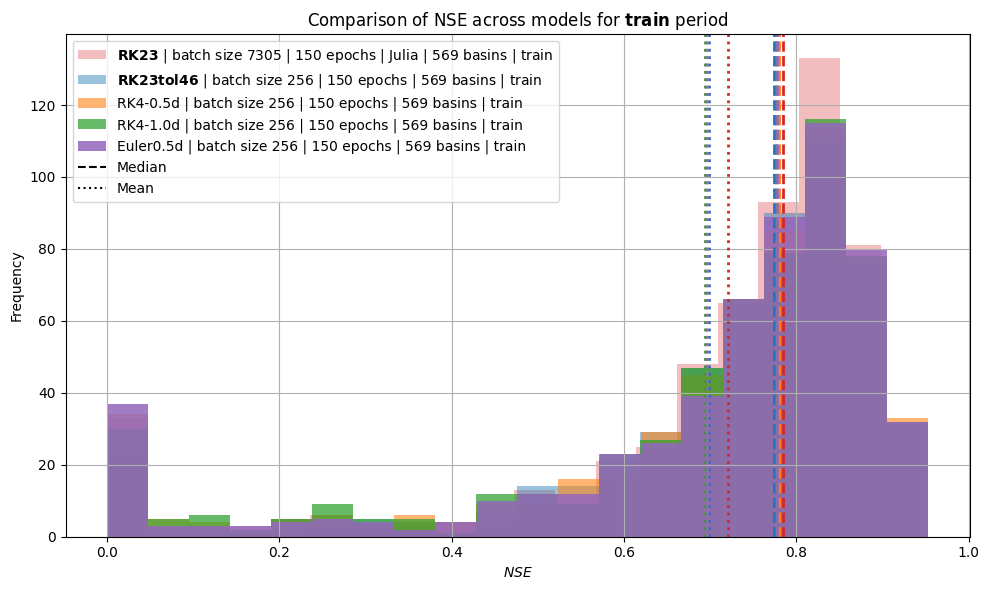

Median $\mathbf{RK23}$ | batch size 7305 | 150 epochs | Julia (valid): 0.662
Mean $\mathbf{RK23}$ | batch size 7305 | 150 epochs | Julia (valid): 0.576
Median $\mathbf{RK23tol46}$ | batch size 256 | 150 epochs (valid): 0.689
Mean $\mathbf{RK23tol46}$ | batch size 256 | 150 epochs (valid): 0.602
Median RK4-0.5d | batch size 256 | 150 epochs (valid): 0.689
Mean RK4-0.5d | batch size 256 | 150 epochs (valid): 0.598
Median RK4-1.0d | batch size 256 | 150 epochs (valid): 0.688
Mean RK4-1.0d | batch size 256 | 150 epochs (valid): 0.596
Median Euler0.5d | batch size 256 | 150 epochs (valid): 0.687
Mean Euler0.5d | batch size 256 | 150 epochs (valid): 0.597


<Figure size 640x480 with 0 Axes>

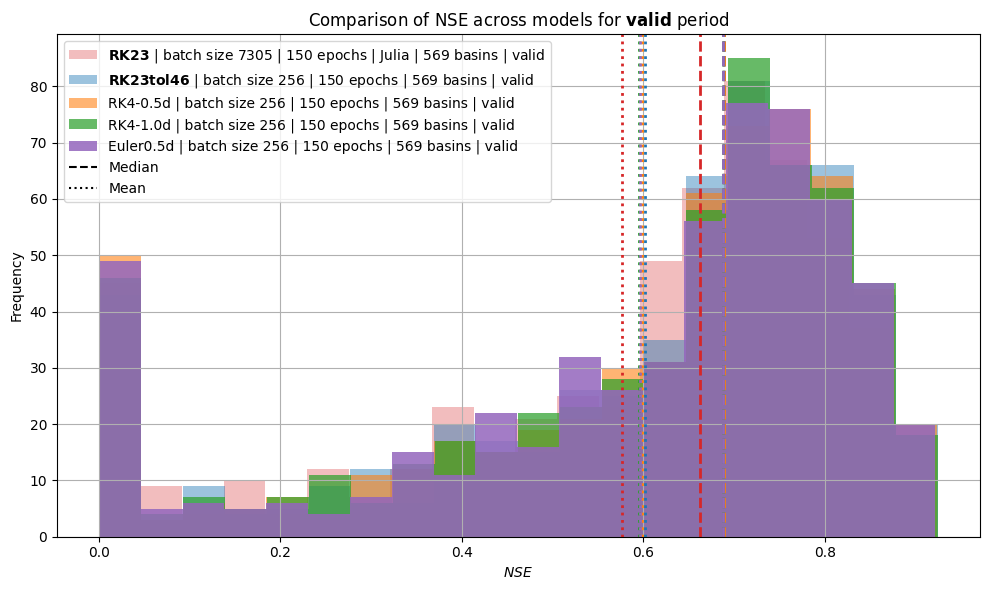

<Figure size 640x480 with 0 Axes>

In [6]:
# Load config_file
with open(config_file_comp_hist, 'r') as ymlfile:
        config_data_hist = yaml.load(ymlfile, Loader=yaml.FullLoader)

folder4hist_dir_list = config_data_hist['folders4cdf_dir']
periods = config_data_hist['periods']

# Call the function
plot_comparative_histograms(folder4hist_dir_list, periods)

## Maps

In [7]:
# Load data_dir.yml
with open(Path(project_dir) / 'src' / 'utils' / 'data_dir.yml', 'r') as f:
    data_dir_dict = yaml.load(f, Loader=yaml.FullLoader)

data_dir = Path(project_dir) / '../CAMELS_US' 

# Load the shape file
hm_catchment_path = data_dir \
    / data_dir_dict['hm_catchment_file']

# Load the shape file
map_shape_path = data_dir \
    / data_dir_dict['map_shape_file']

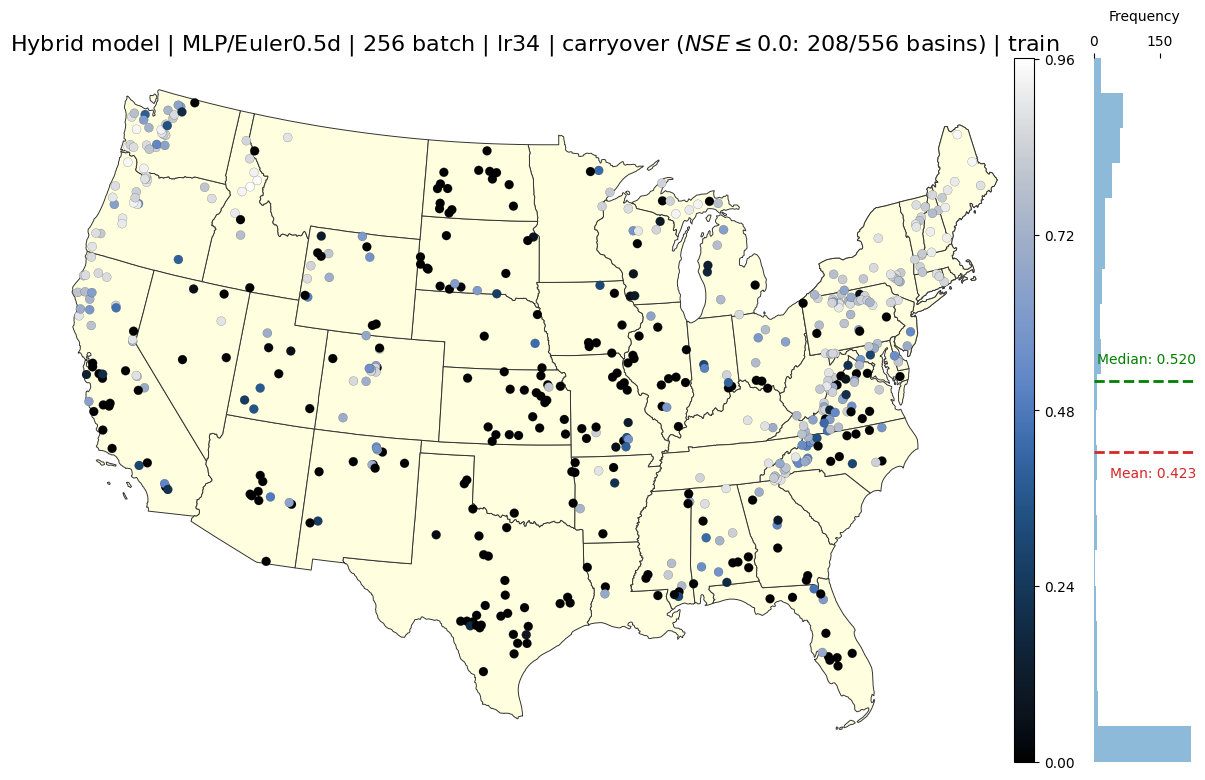

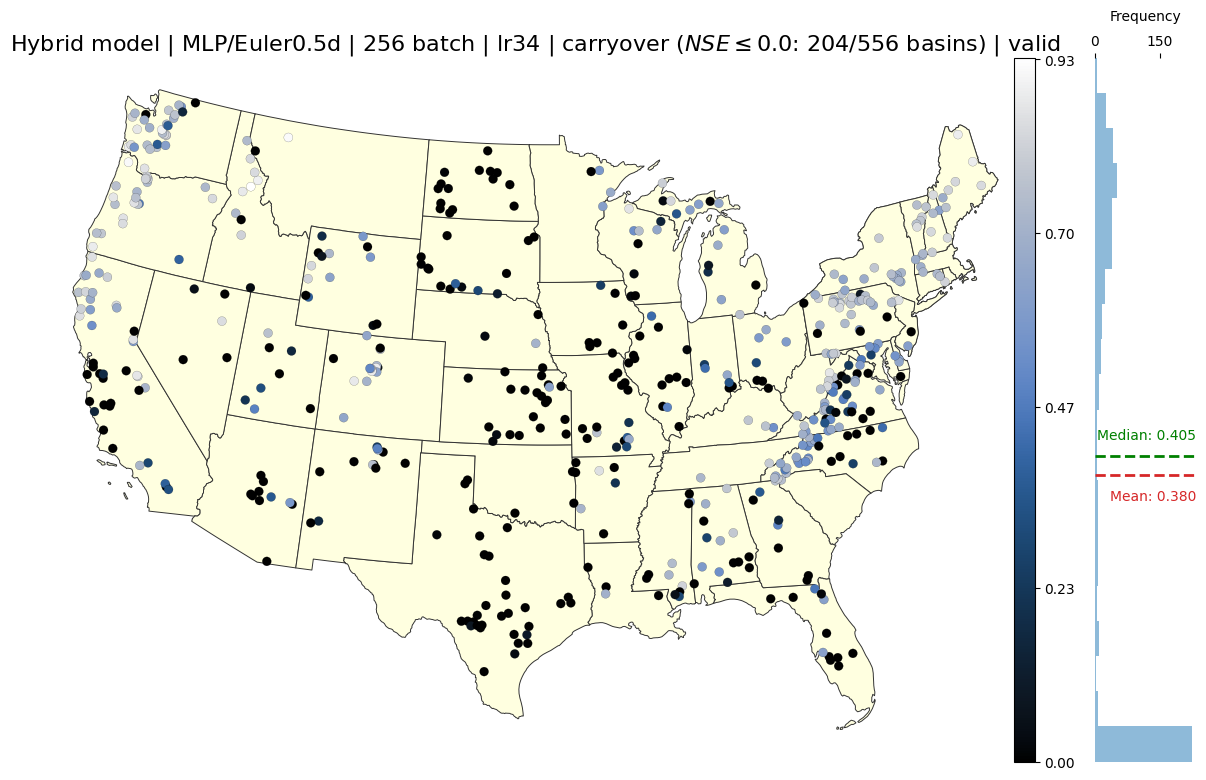

In [8]:
plot_metric_map_period(metrics_path, periods, metrics, threshold_dict,
                           graph_title, epochs, plots_folder, hm_catchment_path, map_shape_path)